In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Reading the Data</h3>

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Data Contains:

    1. age - Age in years
    2. sex - (1 = Male; 0 = Female)
    3. cp - Chest pain type
    4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    5. chol - serum cholestoral in mg/dl
    6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    7. restecg - resting electrocardiographic results
    8. thalach - maximum heart rate achieved
    9. exang - exercise induced angina (1 = yes; 0 = no)
    10. oldpeak - ST depression induced by exercise relative to rest
    11. slope - the slope of the peak exercise ST segment
    12. ca - number of major vessels (0-3) colored by flourosopy
    13. thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
    14. target - have disease or not (1=yes, 0=no)


<h3>Exploring the Data</h3>

In [4]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

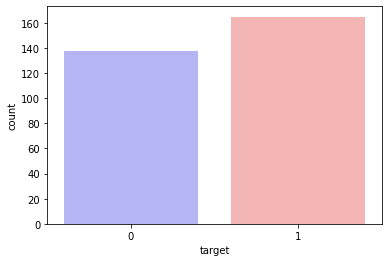

In [5]:
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

In [6]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


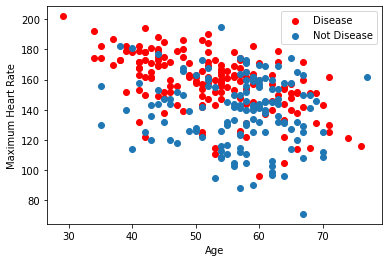

In [7]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

<h4>Creating Dummy Variables</h4>

Since 'cp', 'thal' and 'slope' are categorical variables we'll turn them into dummy variables.

In [8]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")

In [9]:
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [10]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


<h2>Creating Model for Logistic Regression</h2>

In [11]:
y = df.target.values
X = df.drop(['target'],axis = 1)

Normalizing the data

In [12]:
# Normalize the data
X = (X - np.min(X))/(np.max(X) - np.min(X)).values

Splitting our data 80% for train and 20% for test

In [13]:
msk = np.random.rand(len(df))<0.8
X_train = X[msk]
y_train = y[msk]
X_test = X[~msk]
y_test = y[~msk]

Reshaping Train and Test Data

In [14]:
X_train = X_train.T
y_train = y_train.T
X_test = X_test.T
y_test = y_test.T

<h4>Declaring the functions</h4>

In [15]:
def initialize_with_zeros(dim):
    
    w = np.zeros((dim,1)) #w corresponds to the weights
    b = 0 #b correspsonds to the bias
    
    return w,b

In [16]:
def sigmoid(z):
    
    f = 1/(1+np.exp(-z))
    return f

<h3>Forward and Backward Propagation</h3>

Now that your parameters are initialized, you can do the "forward" and "backward" propagation steps for learning the parameters.
Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

Here are the two formulas you will be using: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})$$

In [17]:
def propagate(w,b,X,y):
    
    m = X.shape[1]
    
    #Forward Pass
    A = sigmoid(np.dot(w.T,X)+b)
    cost = (-1/m)*(np.sum(y*np.log(A)+(1-y)*np.log(1-A)))
    
    #Backward Pass
    dw = (1/m)*(np.dot(X,(A-y).T))
    db = (1/m)*np.sum(A-y)
    
    grads = {"dw": dw,
             "db": db}
    
    return grads,cost
    

<h3>Optimization</h3>

In [18]:
def optimize(w, b, X, y, num_iterations, learning_rate, print_cost = False):
    
    costs = []
    index = []
    
    for i in range(num_iterations):
        
        grads,cost = propagate(w,b,X,y)
        
        dw = grads['dw']
        db = grads['db']
        
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        costs.append(cost)
        index.append(i)
    
    params = {"w":w,"b":b}
    
    plt.plot(index,costs)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()
    
    return params, grads, cost

In [19]:
def predict(w,b,X):
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))

    
    A = sigmoid(np.dot(w.T,X)+b)
    
    for i in range(A.shape[1]):
        
        if A[0,i]>0.5:
            Y_prediction[0,i] = 1
        else:
            Y_prediction[0,i] = 0
    
    return Y_prediction

<h3>Merging All the functions</h3>

In [20]:
def model(X_train,y_train,X_test,y_test,num_iterations,learning_rate,print_cost = False):
    
    w, b = initialize_with_zeros(X_train.shape[0])
    
    parameters, grads, costs = optimize(w, b, X_train, y_train, num_iterations, learning_rate, print_cost)
    
    w = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_test = predict(w,b,X_test)
    Y_prediction_train = predict(w,b,X_train)
    
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - y_test)) * 100))

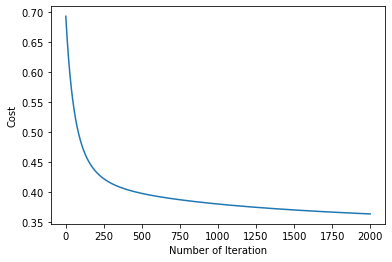

train accuracy: 83.399209486166 %
test accuracy: 88.0 %


In [21]:
model(X_train,y_train,X_test,y_test,2000,0.05,print_cost = True)

In [22]:
X_train.shape

(21, 253)

In [23]:
X_train

,0,1,3,4,5,7,8,9,10,11,...,292,293,294,295,297,298,299,300,301,302
age,0.708333,0.166667,0.562500,0.583333,0.583333,0.312500,0.479167,0.583333,0.520833,0.395833,...,0.604167,0.791667,0.312500,0.708333,0.625000,0.583333,0.333333,0.812500,0.583333,0.583333
sex,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
trestbps,0.481132,0.339623,0.245283,0.245283,0.433962,0.245283,0.735849,0.528302,0.433962,0.339623,...,0.716981,0.547170,0.245283,0.433962,0.660377,0.433962,0.150943,0.471698,0.339623,0.339623
chol,0.244292,0.283105,0.251142,0.520548,0.150685,0.312785,0.166667,0.095890,0.257991,0.340183,...,0.226027,0.196347,0.098174,0.139269,0.114155,0.262557,0.315068,0.152968,0.011416,0.251142
fbs,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
restecg,0.000000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,...,0.000000,0.000000,0.500000,0.000000,0.000000,0.500000,0.500000,0.500000,0.500000,0.000000
thalach,0.603053,0.885496,0.816794,0.702290,0.587786,0.778626,0.694656,0.786260,0.679389,0.519084,...,0.572519,0.603053,0.557252,0.557252,0.145038,0.396947,0.465649,0.534351,0.335878,0.786260
exang,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
oldpeak,0.370968,0.564516,0.129032,0.096774,0.064516,0.000000,0.080645,0.258065,0.193548,0.032258,...,0.451613,0.129032,0.451613,0.645161,0.161290,0.032258,0.193548,0.548387,0.193548,0.000000
ca,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.500000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,0.500000,0.250000,0.250000
